# Real Estate Listing Analysis

<b>Research Objectives:</b> 
    
1. Identify interesting features and dependencies that exist in the real estate market.
2. Track anomalies in the data and handle them appropriately.
3. Determine factors influencing the pricing of properties.
    
<b>Research Process:</b> 
    
I will start by obtaining the necessary data from the file 'real_estate_data.csv'. Before conducting the analysis, I will need to explore the data, identify errors, anomalies, outliers, and duplicates. I will verify the data for completeness and credibility. Once all data issues are resolved (without distorting the final result) and new columns are added as required, I can proceed with the exploratory analysis.

<b>Research Stages:</b>
    
1. Exploring raw data (loading, general information, and histograms).
2. Data preprocessing (handling missing values, duplicates, rare values, and data type changes).
3. Adding new columns required for further analysis.
4. Exploratory data analysis.
    * Analysis for the Leningrad region.
    * Analysis for Saint Petersburg.
    * Factors influencing property pricing.
5. Summary and Conclusions.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Exploring raw data

In [59]:
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

Let's explore the general information about the obtained dataframe.

In [60]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [61]:
data.shape[0]

23699

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

The overall histogram for all numerical columns of the table.

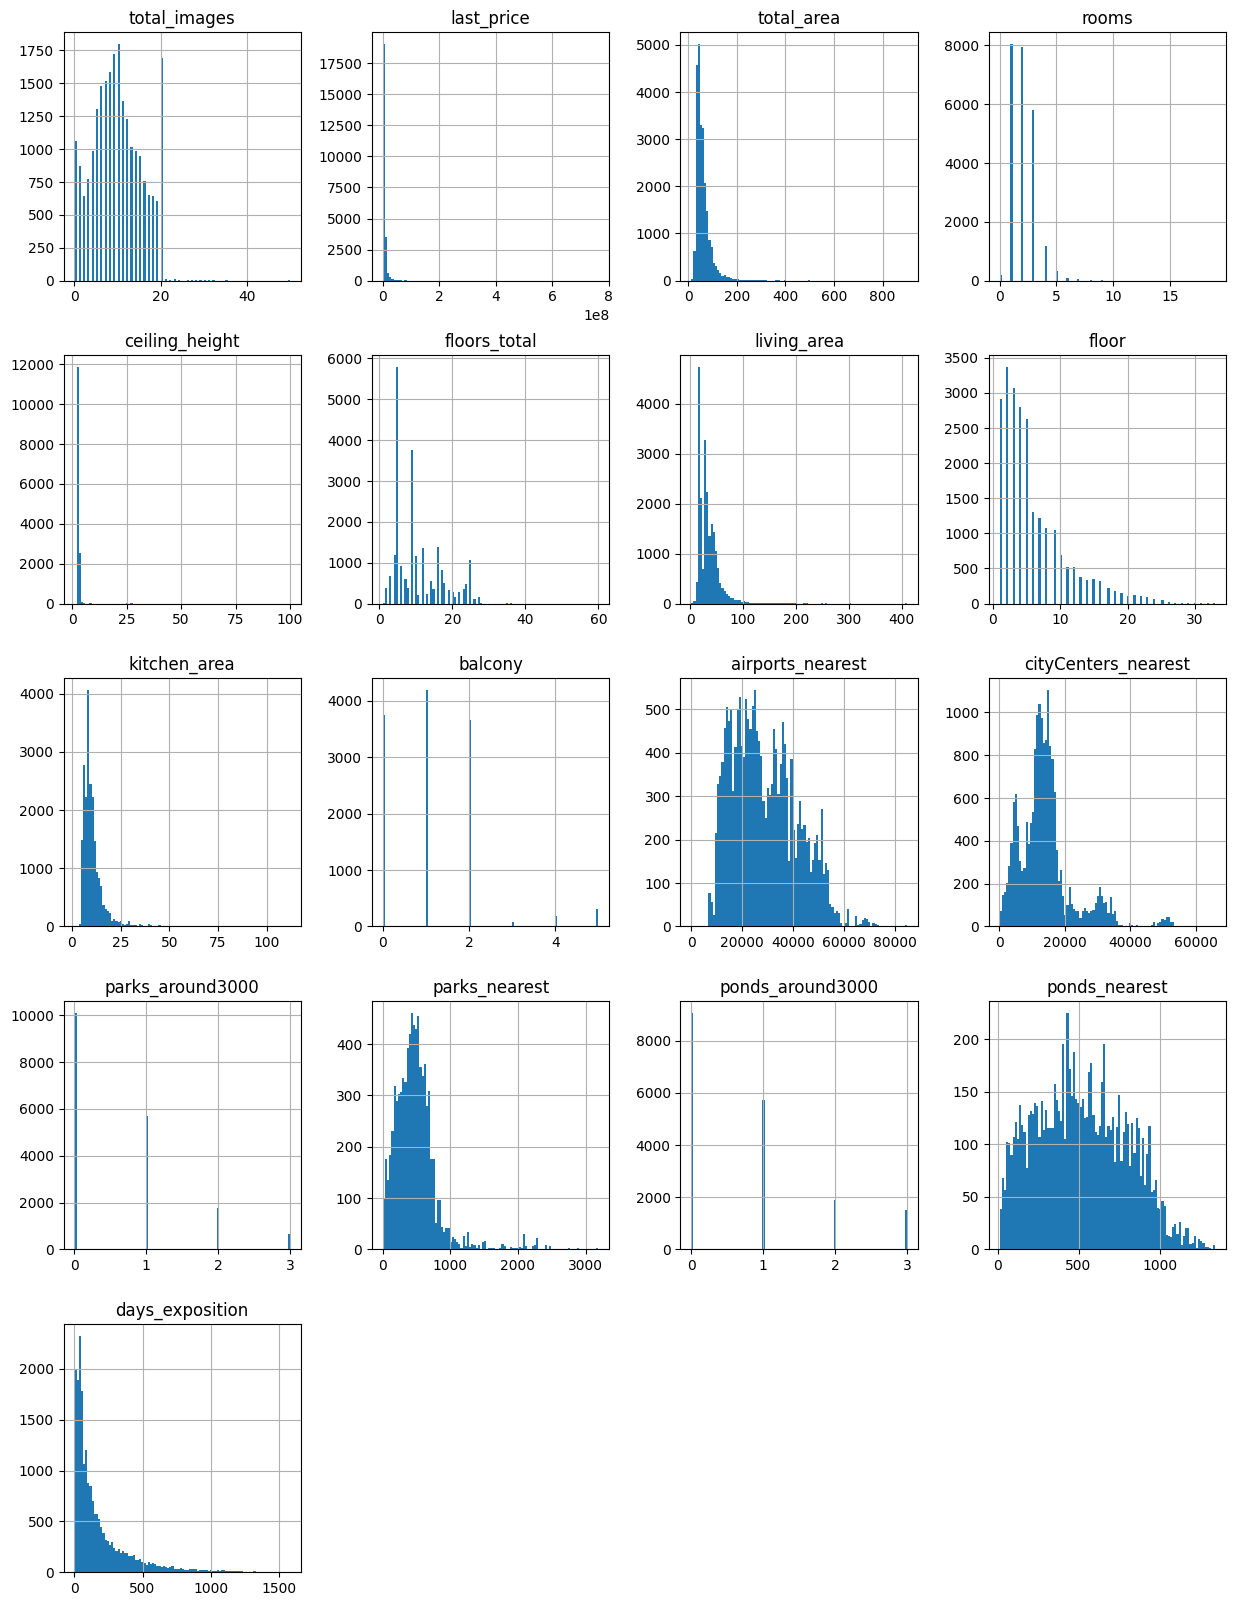

In [63]:
data.hist(bins=100, figsize=(15, 20));

## 2. Data preprocessing

### Searching for missing values in columns

In [64]:
na = data.isna().sum()
na_perc = round((data.isna().mean() * 100), 2)

display(pd.DataFrame({"Number of misses": na, "Miss rate": na_perc}).style.format('{:.2f}').background_gradient('coolwarm'))
print("Total columns:  {}, no misses: {}, misses: {}".format(len(na), (na == 0).sum(), (na != 0).sum() ))

,Number of misses,Miss rate
total_images,0.00,0.00
last_price,0.00,0.00
total_area,0.00,0.00
first_day_exposition,0.00,0.00
rooms,0.00,0.00
ceiling_height,9195.00,38.80
floors_total,86.00,0.36
living_area,1903.00,8.03
floor,0.00,0.00
is_apartment,20924.00,88.29


Total columns:  22, no misses: 8, misses: 14


In [65]:
# Filling missing values in the 'balcony' column with zeros
data['balcony'] = data['balcony'].fillna(0)

# Setting 'is_apartment' column to False for missing values
data['is_apartment'] = data['is_apartment'].fillna(False)

# Dropping rows with missing values in the 'floors_total' column
data.dropna(subset=['floors_total'], inplace=True)

# Filling missing values in 'living_area' 
data.loc[(data['living_area'].isna()) & (data['is_apartment'] == True), 'living_area'] = 0

# Filling missing values in the 'ceiling_height' column with the median value
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())


The appearance of missing values in the 'balcony' column can be attributed to the absence of balconies in some apartments. The column 'is_apartment' contains boolean values, indicating whether a property is an apartment or not. I fill the missing values with False, but it's possible that True values were accidentally omitted. Where 'is_apartment' is True, I fill the missing values in the 'living_area' column with zeros, as apartments are non-residential premises. I fill the missing values in the 'ceiling_height' column with the median value.

### Examining Data Types in Each Column

In [66]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [67]:
data_type_conversions = {
    'first_day_exposition': 'datetime64',
    'floors_total': 'int64',
    'last_price': 'int64',
    'balcony': 'int64',
    'parks_around3000': 'Int64',    
    'ponds_around3000': 'Int64',    
    'parks_nearest': 'Int64',      
    'airports_nearest': 'Int64',  
    'ponds_nearest': 'Int64'   
}

data = data.astype(data_type_conversions)


I am formatting the date column to a more meaningful and convenient format for reading. The number of floors and balconies in a building can only be represented as integers. Additionally, data expressed in meters will be converted to the integer data type.

### Handling Duplicates

In [68]:
data = data.drop_duplicates()

Let's finding implicit duplicates:

In [69]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [70]:
data['locality_name'] = data['locality_name'].replace('поселок|посёлок|деревня|село|садоводческое|некоммерческое|садовое|товарищество|городской|городского|типа|имени|коттеджный|при железнодорожной|станции', '', regex=True)
data['locality_name'] = data['locality_name'].str.strip()

### Handling Rare and Outlier Values

In [71]:
 data['ceiling_height'].value_counts().sort_index()

1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: ceiling_height, Length: 183, dtype: int64

In [72]:
data['last_price'].value_counts().sort_index()

12190        1
430000       2
440000       1
450000       4
470000       3
            ..
300000000    1
330000000    1
401300000    1
420000000    1
763000000    1
Name: last_price, Length: 2939, dtype: int64

In [73]:
# Ceiling heights with values greater than or equal to 24 are considered anomalous. 
# To address this, we divide the ceiling heights by 10 for more reasonable representation.
data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] / 10

# Filter out ceiling heights outside the range of 2.4 to 5 meters
data = data.query('2.4 <= ceiling_height <= 5')

# Properties with more than 3 balconies are considered excessive. 
# To maintain consistency, we set the number of balconies to 3
data.loc[data['balcony'] >= 4, 'balcony'] = 3

# filtering prices
data = data.query('400000 < last_price < 400000000')

I correct improperly recorded values in the 'ceiling_height' column and apply a filter to retain only acceptable values within the range of 2.4 to 5 meters. I set a uniform number of balconies to 3 for properties where the recorded count exceeds 3. I remove outlier values in the 'last_price' column. Properties with prices below 400,000 and above 400,000,000 are considered outliers and are excluded from the dataset. 

### Conclusions of Data Preprocessing:

1. Missing Values: I identified columns with missing values and addressed them accordingly. In the 'balcony' column, I filled the empty values with 0, indicating that the apartment does not have any balconies. For missing values in the 'is_apartment' column, I filled them with False, indicating that the property is not an apartment. Where 'is_apartment' is True, I filled the missing values in the 'living_area' column with zeros, as apartments are non-residential premises. Lastly, I filled missing values in the 'ceiling_height' column with the median value.

2. Data Type Conversion: I converted the data to more appropriate and meaningful data types.

3. Duplicate Handling: I addressed both explicit and implicit duplicates in the dataset to ensure data integrity.

4. Rare and Anomalous Values: I handled rare and anomalous values in the dataset by filtering them out, maintaining a more realistic representation of the data.

## 3. Adding new columns required for further analysis.

In [74]:
data['price_per_sqm'] = data['last_price'] / data['total_area']
data['publication_weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['publication_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['publication_year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['floor_type'] = data.apply(lambda x: 'первый' if x['floor']==1 else ('последний' if x['floor']==x['floors_total'] else 'другой'), axis=1)
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round().astype('Int64')

## 4.Exploratory data analysis.

### Study of Object Parameters

count    23572.000000
mean        60.245677
std         34.959753
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        631.200000
Name: total_area, dtype: float64

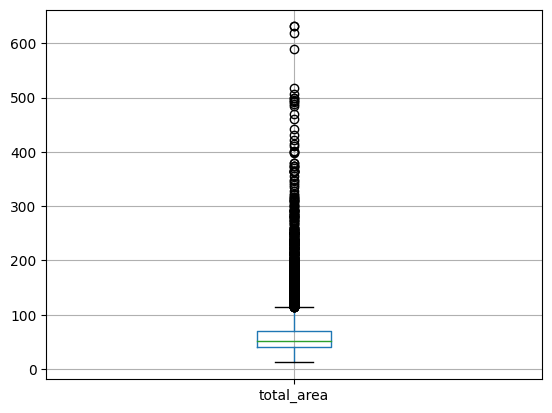

In [75]:
data.boxplot('total_area')
data['total_area'].describe()

count    21715.000000
mean        34.399648
std         21.769902
min          0.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.000000
Name: living_area, dtype: float64

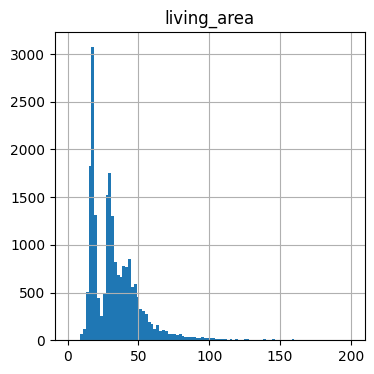

In [76]:
data.hist('living_area', bins=100, figsize=(4,4), range=(1, 200))
data['living_area'].describe()

count    21350.000000
mean        10.556100
std          5.849378
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

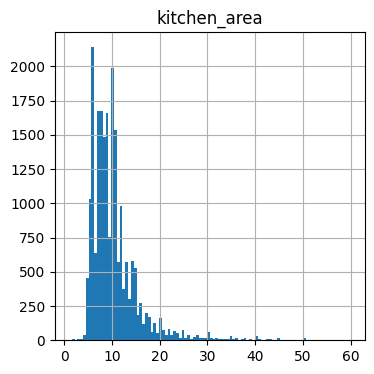

In [77]:
data.hist('kitchen_area', bins=100, figsize=(4,4), range=(1, 60))
data['kitchen_area'].describe()

count    2.357200e+04
mean     6.460484e+06
std      8.893709e+06
min      4.300000e+05
25%      3.414500e+06
50%      4.650000e+06
75%      6.799000e+06
max      3.300000e+08
Name: last_price, dtype: float64

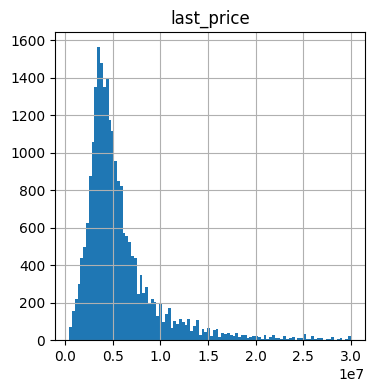

In [78]:
data.hist('last_price', bins=100, figsize=(4,4), range=(400000, 30000000))
data['last_price'].describe()

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

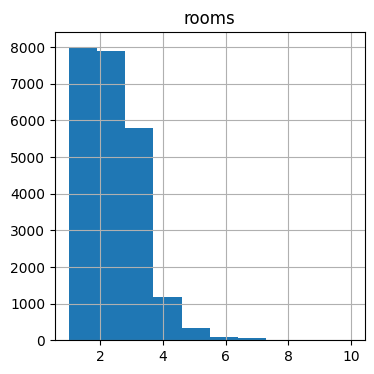

In [79]:
data.hist('rooms', bins=10, figsize=(4,4), range=(1, 10))

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

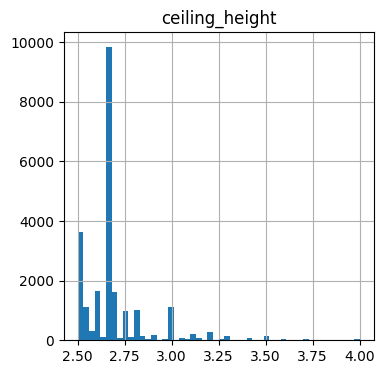

In [80]:
data.hist('ceiling_height', bins=50, figsize=(4,4), range=(2.5, 4))

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

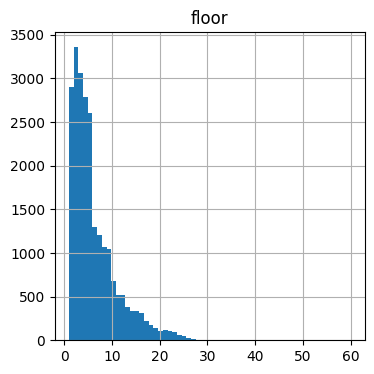

In [81]:
data.hist('floor', bins=60, figsize=(4,4), range=(1, 60))

<AxesSubplot:>

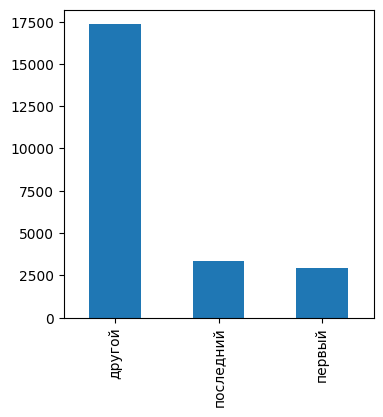

In [82]:
data['floor_type'].value_counts().plot.bar(figsize=(4,4))

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

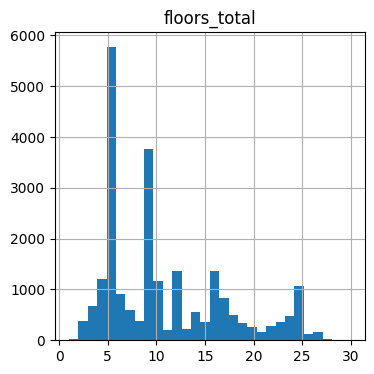

In [83]:
data.hist('floors_total', bins=30, figsize=(4,4), range=(1, 30))

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

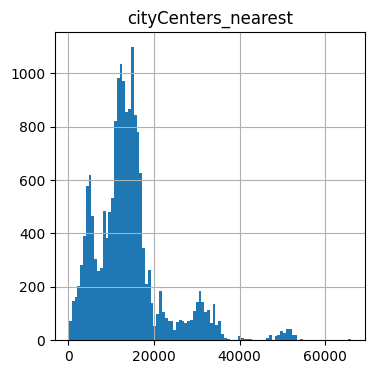

In [84]:
data.hist('cityCenters_nearest', bins=100, figsize=(4,4))

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

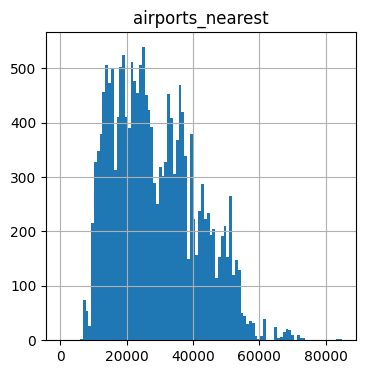

In [85]:
data.hist('airports_nearest', bins=100, figsize=(4,4))

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

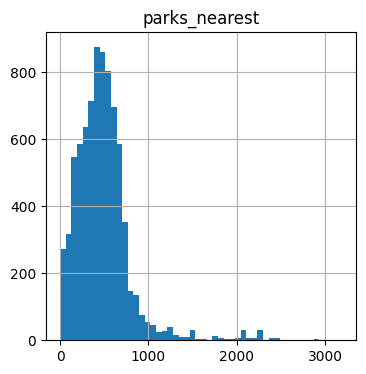

In [86]:
data.hist('parks_nearest', bins=50, figsize=(4,4))

array([[<AxesSubplot:title={'center':'publication_weekday'}>]],
      dtype=object)

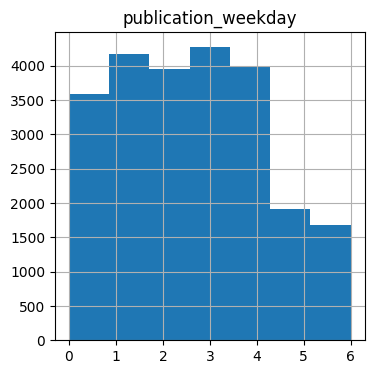

In [87]:
data.hist('publication_weekday', bins=7, figsize=(4,4))

array([[<AxesSubplot:title={'center':'publication_month'}>]], dtype=object)

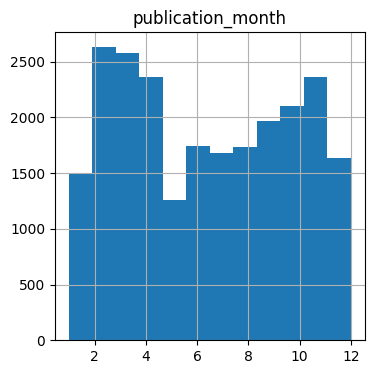

In [88]:
data.hist('publication_month', bins=12, figsize=(4,4))

After analyzing the dataset, we found that a significant portion of the apartments have an average area of around 60 square meters, with the living area typically not exceeding 50 square meters, and the kitchen area remaining within 10 square meters.

The average price of the apartments in the dataset is approximately 6 million rubles. We observed that 2-room apartments with a ceiling height of up to 3 meters are the most common among the listings.

Interestingly, the majority of the advertisements are published on weekdays, indicating higher activity during regular workdays.

Furthermore, there is a noticeable decline in real estate sales during the summer months and the New Year period, suggesting seasonal trends in the market.

### Study of the Number of Days for Apartment Sales

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

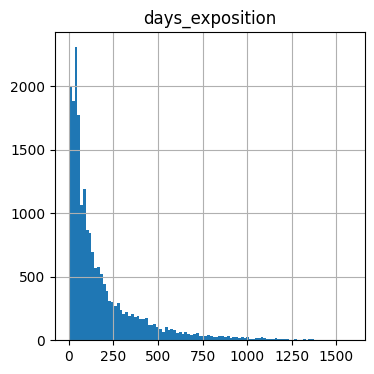

In [89]:
# How many days each listing was posted?
data.hist('days_exposition', bins=100, figsize=(4,4))

count    20406.000000
mean       180.905910
std        219.745938
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

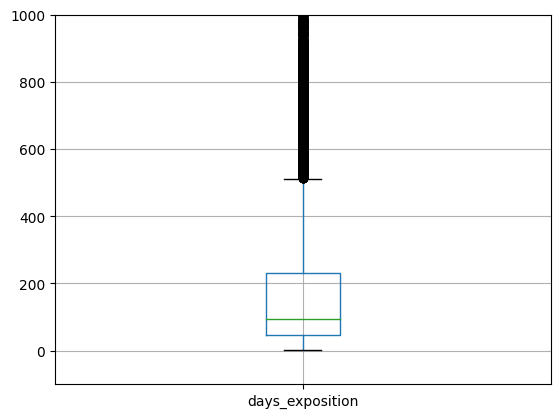

In [90]:
plt.ylim(-100, 1000)
data.boxplot('days_exposition')
data['days_exposition'].describe()

On average, apartments are sold within 181 days. Sales completed within 45 days can be considered as fast, while those taking 232 days or more are unusually long.

### What affects the price?

#### Dependency on Total Area:

0.7057876608172444

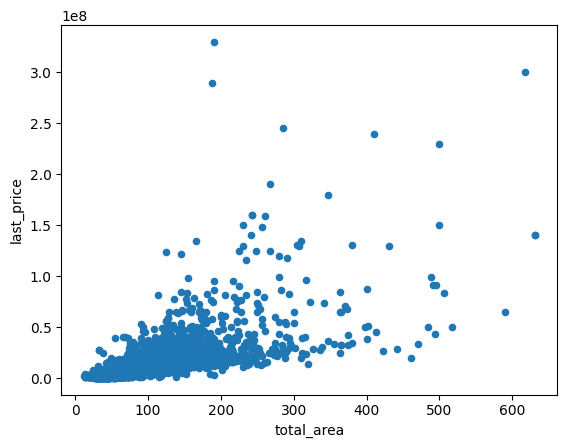

In [91]:
data.sort_values('total_area').plot(x='total_area', y='last_price', kind='scatter')
data['last_price'].corr(data['total_area'])

We observe a correlation of 0.7, indicating a relationship between the total area and the price. An increase in the total area is generally accompanied by a rise in the price, but this is not always the case, as the correlation is not very strong.

#### Dependency on Living Area

0.6142806632444069

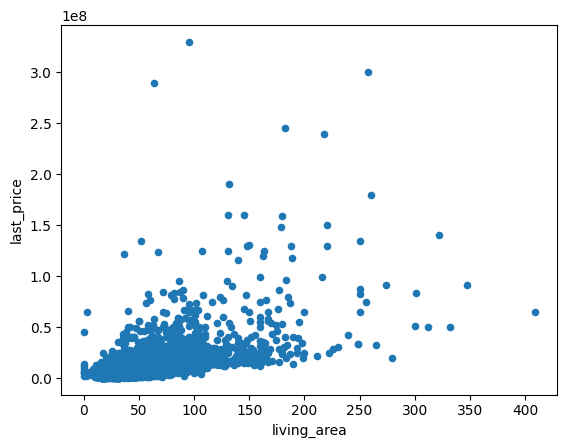

In [92]:
data.sort_values('living_area').plot(x='living_area', y='last_price', kind='scatter')
data['last_price'].corr(data['living_area'])

The correlation is 0.6, indicating a relationship, but it is not very strong.

#### Dependency on Kitchen Area

0.5287694335258211

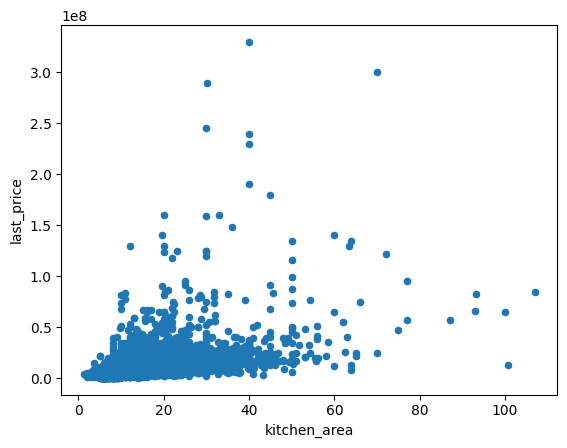

In [93]:
data.sort_values('kitchen_area').plot(x='kitchen_area', y='last_price', kind='scatter')
data['last_price'].corr(data['kitchen_area'])

The same applies to the kitchen area. The correlation is 0.52, indicating a relationship, but it is not very strong.

#### Dependency on the Number of Rooms

0.4023580317018794

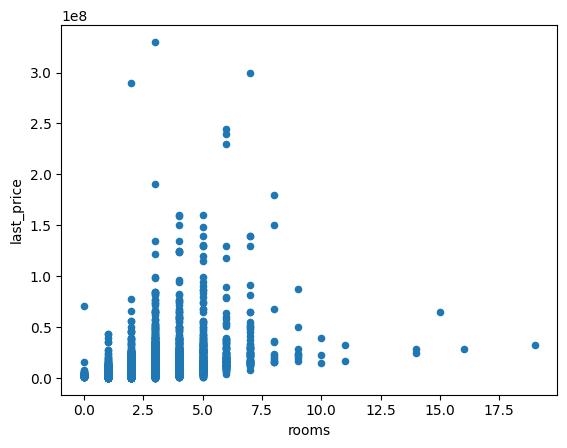

In [94]:
data.sort_values('rooms').plot(x='rooms', y='last_price', kind='scatter')
data['last_price'].corr(data['rooms'])

There is no strong correlation. The number of rooms does not significantly influence the price.

#### Dependency on the Floor Level of the Apartment

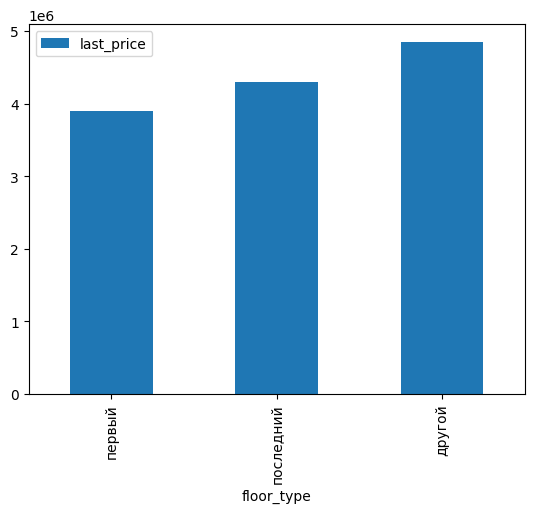

In [95]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').sort_values(by='last_price').plot(kind='bar');

It is noticeable how the floor level of the apartment influences the final price. If the apartment is not on the first or top floor, it can be sold at a higher price.

#### Dependency on Listing Date (Day of the Week, Month, Year)

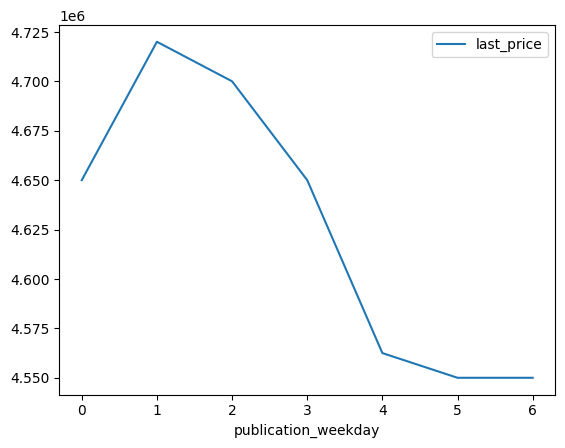

In [96]:
data.pivot_table(index='publication_weekday', values='last_price', aggfunc='median').sort_values(by='publication_weekday').plot();

In general, apartment listings are primarily posted on weekdays. Interestingly, the highest prices are set on Tuesdays.

-0.0006415391161569249

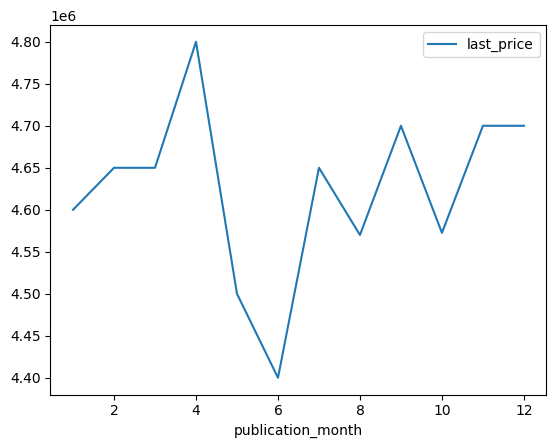

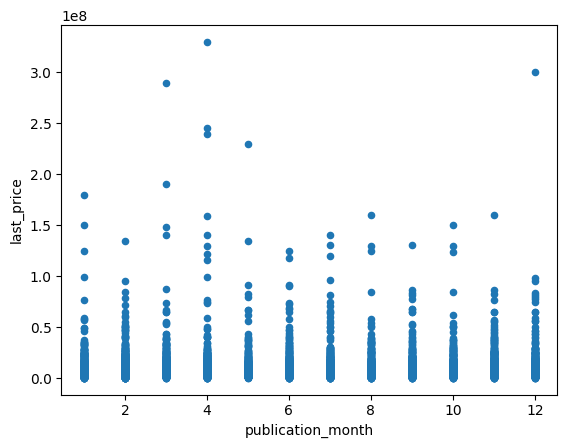

In [97]:
data.pivot_table(index='publication_month', values='last_price', aggfunc='median').sort_values(by='publication_month').plot()

data.sort_values('publication_month').plot(x='publication_month', y='last_price', kind='scatter')
data['last_price'].corr(data['publication_month'])

The number of sales is at its lowest during summer and winter, but this does not have any impact on the prices.

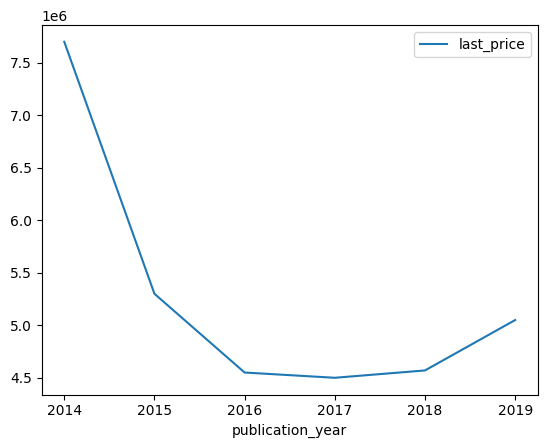

In [98]:
data.pivot_table(index='publication_year', values='last_price', aggfunc='median').sort_values(by='publication_year').plot();

In [99]:
data.pivot_table(index='publication_year', values=['last_price', 'total_area'], aggfunc='median')

,last_price,total_area
publication_year,,
2014,7700000,76.26
2015,5300000,60.00
2016,4550000,53.10
2017,4500000,52.00
2018,4570000,50.50
2019,5050000,52.00


Since 2014, there has been a decline in the average area of the sold apartments, which consequently led to a decrease in prices. This once again demonstrates the correlation between the price and the total area of the apartment.

#### Average Price per Square Meter in the Top 10 Localities with the Highest Number of Listings

In [100]:
pivot_localities = data.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['median', 'count'])
pivot_localities.columns = pivot_localities.columns.to_flat_index()
pivot_localities = pivot_localities.rename(columns={('median', 'price_per_sqm'): 'mean_price', ('count', 'price_per_sqm'): 'amount'})
pivot_localities.sort_values(by='amount', ascending=False).head(10)

,mean_price,amount
locality_name,,
Санкт-Петербург,104761.904762,15628
Мурино,86250.377687,586
Кудрово,95588.235294,469
Шушары,76829.268293,439
Всеволожск,65789.473684,397
Пушкин,100000.000000,369
Колпино,74723.748474,338
Парголово,91642.857143,327
Гатчина,67796.610169,307


The average price per square meter in St. Petersburg is 114,500 rubles, while in Vyborg, one square meter will cost 58,000 rubles.

#### Analysis of the Price per m² Variation in St. Petersburg for Each Kilometer from the City Center

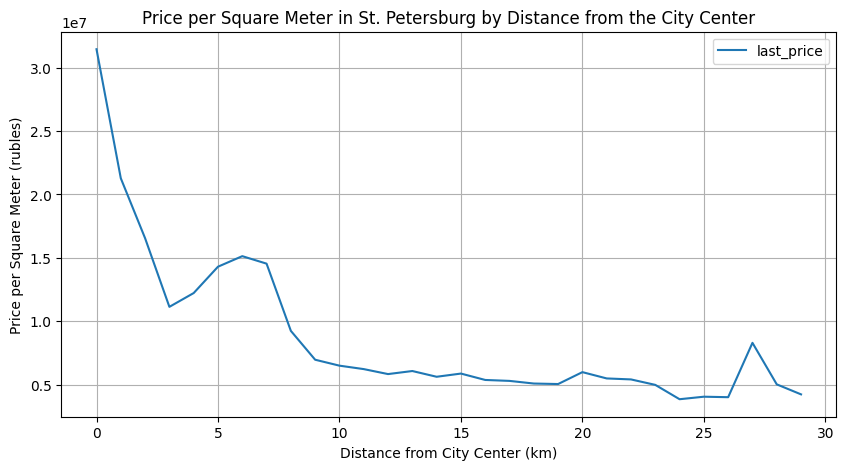

In [101]:
# Create a pivot table and plot the data for the price per square meter in St. Petersburg based on the distance from the city center.
data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price')\
    .plot(grid=True, title='Price per Square Meter in St. Petersburg by Distance from the City Center', figsize=(10, 5))

plt.xlabel('Distance from City Center (km)')
plt.ylabel('Price per Square Meter (rubles)')

plt.show()

As expected, the apartments located in the city center are the most expensive. Beyond 8 kilometers from the center, the prices gradually decrease.

## Summary and Conclusions

After data preprocessing, we examined the parameters that have the most significant impact on the price. The total area, living area, and kitchen area emerged as the most influential factors. The type of floor also affects the price, with apartments on the first floor having lower prices compared to others. Interestingly, the publication date does not seem to have an impact on the price.

Furthermore, the distance from the city center is inversely related to the price, with properties farther from the center generally having lower prices.

Based on the analysis, the best time to sell real estate is during the spring, while the worst periods are summer and December-January.